In [33]:
import pandas as pd
%matplotlib inline
import pickle as pkl
import numpy as np
import matplotlib

# Global variables

In [2]:
data_folder_name = 'PPG_FieldStudy'

# Functions

In [3]:
def get_script_dir_path():
    script_dir_path = %pwd 
    script_dir_path += '\\'
    return script_dir_path

In [4]:
def standardize_to_700hz(sensor_values, frequency):
    sensor_values_700hz = []
    ratio = 700/frequency
    new_len = int(len(sensor_values) * ratio) # len of the standardized list
    row_index = 0
    for i in range(new_len):
        sensor_values_700hz.append(sensor_values[int(i/ratio)])
        row_index += 1
    return sensor_values_700hz

In [5]:
def multiply_in_list(value, nb):
    new_list = []
    for i in range(nb):
        new_list.append(value)
    return new_list

# 1) Data preparation

## 1.1) Create paths to data

In [6]:
script_dir_path = get_script_dir_path()
print(script_dir_path)

C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\


In [7]:
data_folder_path = script_dir_path + data_folder_name + '\\'
print(data_folder_path)

C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\


In [8]:
# Creating path to pkl file for each subject & saving pkl data in list
pkl_path_template = "S{}\\S{}.pkl"
pkl_pd_list = []

for i in range(15):
    path = data_folder_path + pkl_path_template.format(i+1,i+1)
    print(path)
    pkl_pd_list.append(pd.read_pickle(path))

C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S1\S1.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S2\S2.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S3\S3.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S4\S4.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S5\S5.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S6\S6.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S7\S7.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S8\S8.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S9\S9.pkl
C:\Users\Louis\python_scripts\final_project\python_for_data_analysis\PPG_FieldStudy\S10\S10.pkl
C:\Users\Louis\python_scripts\final_project\python_for_dat

## 1.2) Create pandas dataframe from data

In [9]:
def create_pd_dataframe(pkl_data):

    # Capteur Empatica E4
    wrist_ACC = pkl_data['signal']['wrist']['ACC'] # 32 Hz
    wrist_BVP = pkl_data['signal']['wrist']['BVP'] # 64 Hz
    wrist_EDA = pkl_data['signal']['wrist']['EDA'] # 4 Hz
    wrist_TEMP = pkl_data['signal']['wrist']['TEMP'] # 4 Hz

    # Capteur RespiBAN
    chest_ACC = pkl_data['signal']['chest']['ACC'] # 700 Hz
    chest_ECG = pkl_data['signal']['chest']['ECG'] # 700 Hz
    chest_resp = pkl_data['signal']['chest']['Resp'] # 700 Hz
    
    # extract x, y, z values
    chest_ACC_x = np.array(chest_ACC)[:,0]
    chest_ACC_y = np.array(chest_ACC)[:,1]
    chest_ACC_z = np.array(chest_ACC)[:,2]

    print('len wrist_ACC : ' + str(len(wrist_ACC)))
    print('len wrist_BVP : ' + str(len(wrist_BVP)))
    print('len wrist_EDA : ' + str(len(wrist_EDA)))
    print('len wrist_TEMP : ' + str(len(wrist_TEMP)))
    print()
    print('len chest_ACC : ' + str(len(chest_ACC)))
    print('len chest_ECG : ' + str(len(chest_ECG)))
    print('len chest_resp : ' + str(len(chest_resp)))
    print()


    # Standardize every values from empatica E4 sensor to 700hz format
    wrist_ACC_700hz = standardize_to_700hz(wrist_ACC, 32)
    wrist_BVP_700hz = standardize_to_700hz(wrist_BVP, 64)
    wrist_EDA_700hz = standardize_to_700hz(wrist_EDA, 4)
    wrist_TEMP_700hz = standardize_to_700hz(wrist_TEMP, 4)
    
    # extract x, y, z values
    wrist_ACC_x = np.array(wrist_ACC_700hz)[:,0]
    wrist_ACC_y = np.array(wrist_ACC_700hz)[:,1]
    wrist_ACC_z = np.array(wrist_ACC_700hz)[:,2]

    print('new len wrist_ACC 700hz : ' + str(len(wrist_ACC_700hz)))
    print('new len wrist_BVP 700hz : ' + str(len(wrist_BVP_700hz)))
    print('new len wrist_EDA 700hz : ' + str(len(wrist_EDA_700hz)))
    print('new len wrist_TEMP 700hz : ' + str(len(wrist_TEMP_700hz)))
    print()

    # Activity
    activity = pkl_data['activity']
    print('len activity : ' + str(len(activity)))

    # Standardize activity values to 700hz format
    activity_700hz = standardize_to_700hz(activity, 4)
    print('new len activity : ' + str(len(activity_700hz)))
    print()

    # subjects infos
    subject = pkl_data['subject']
    age = pkl_data['questionnaire']['AGE']
    gender = pkl_data['questionnaire']['Gender']
    height = pkl_data['questionnaire']['HEIGHT']
    weight = pkl_data['questionnaire']['WEIGHT']
    skin = pkl_data['questionnaire']['SKIN']
    sport = pkl_data['questionnaire']['SPORT']

    print('age : ' + str(age))
    print('gender : ' + gender)
    print('height : ' + str(height))
    print('weight : ' + str(weight))
    print('skin : ' + str(skin))
    print('sport : ' + str(sport))
    
    # replace gender per a number
    if (gender == ' m'):
        gender = 0
    else:
        gender = 1    
    print('new gender value : ' + str(gender))
    
    # create lists for subjects infos by just multiplying value by len(chest_resp)
    target_len = len(chest_resp)
    
    age_list = multiply_in_list(age, target_len)
    gender_list = multiply_in_list(gender, target_len)
    height_list = multiply_in_list(height, target_len)
    weight_list = multiply_in_list(weight, target_len)
    skin_list = multiply_in_list(skin, target_len)
    sport_list = multiply_in_list(sport, target_len)

    
    # Create dataframe
    data = {'activity':np.array(activity_700hz)[:,0], \
            'age':age_list, \
            'gender':gender_list, \
            'height':height_list, \
            'weight':weight_list, \
            'skin':skin_list, \
            'sport':sport_list, \
            'wrist_acc_x':wrist_ACC_x, \
            'wrist_acc_y':wrist_ACC_y, \
            'wrist_acc_z':wrist_ACC_z, \
            'wrist_bvp':wrist_BVP_700hz, \
            'wrist_eda':wrist_EDA_700hz, \
            'wrist_temp':wrist_TEMP_700hz, \
            'chest_ACC_x':chest_ACC_x, \
            'chest_ACC_y':chest_ACC_y, \
            'chest_ACC_z':chest_ACC_z, \
            'chest_ecg':np.array(chest_ECG)[:,0], \
            'chest_resp':np.array(chest_resp)[:,0]
           }
    
    pd_data = pd.DataFrame(data)
    
    print('finished creating dataframe for subject : ' + subject)
    
    return pd_data

In [ ]:
# Create a panda dataframe for each subject
subjects_data = []
not_working_list = [] # if we cant convert to panda, then save the id here
for i in range(15):
    print('---------------------------------')
    print('Starting on : S' + str(i+1))
    print('---------------------------------')
    try:
        subjects_data.append(create_pd_dataframe(pkl_pd_list[i]))
    except:
        print("subject broken : " + str(i))
        not_working_list.append(i)
    print('---------------------------------')
    print('Finished with ' + str(i+1))
    print('---------------------------------')
    print()

# 2) Analyzing data 

In [10]:
frame_8 = create_pd_dataframe(pkl_pd_list[8])

len wrist_ACC : 273920
len wrist_BVP : 547840
len wrist_EDA : 34240
len wrist_TEMP : 34240

len chest_ACC : 5992000
len chest_ECG : 5992000
len chest_resp : 5992000

new len wrist_ACC 700hz : 5992000
new len wrist_BVP 700hz : 5992000
new len wrist_EDA 700hz : 5992000
new len wrist_TEMP 700hz : 5992000

len activity : 34240
new len activity : 5992000

age : 28
gender :  f
height : 167.0
weight : 60.0
skin : 4
sport : 5
new gender value : 1
finished creating dataframe for subject : S9


In [35]:
print(frame_8.reset_index())

           index  activity  age  gender  height  weight  skin  sport  \
0              0       0.0   28       1   167.0    60.0     4      5   
1              1       0.0   28       1   167.0    60.0     4      5   
2              2       0.0   28       1   167.0    60.0     4      5   
3              3       0.0   28       1   167.0    60.0     4      5   
4              4       0.0   28       1   167.0    60.0     4      5   
5              5       0.0   28       1   167.0    60.0     4      5   
6              6       0.0   28       1   167.0    60.0     4      5   
7              7       0.0   28       1   167.0    60.0     4      5   
8              8       0.0   28       1   167.0    60.0     4      5   
9              9       0.0   28       1   167.0    60.0     4      5   
10            10       0.0   28       1   167.0    60.0     4      5   
11            11       0.0   28       1   167.0    60.0     4      5   
12            12       0.0   28       1   167.0    60.0     4   

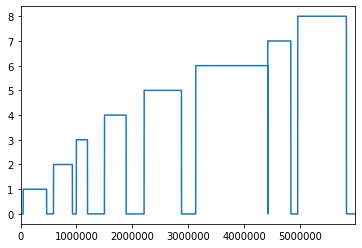

In [27]:
frame_8['activity'].plot.line()

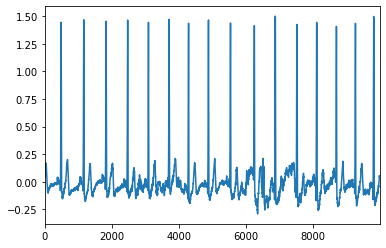

In [42]:
frame_8['chest_ecg'].iloc[0:10000].plot.line()

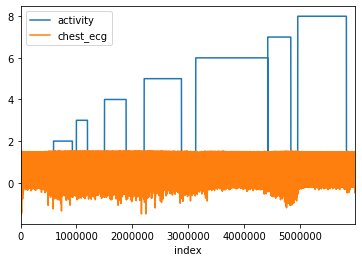

In [45]:
frame_8.reset_index().plot(x='index', y=['activity','chest_ecg'])

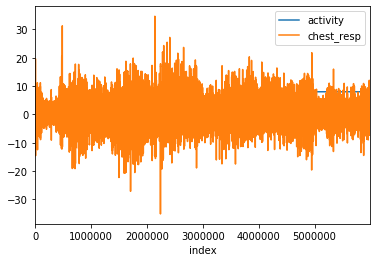

In [46]:
frame_8.reset_index().plot(x='index', y=['activity','chest_resp'])